In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,x,y,scoring='accuracy',cv=10)
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [9]:
print(scores.mean())

0.9666666666666668


In [12]:
ran = []
for k in range(2,31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x,y,scoring='accuracy',cv=10)
    ran.append(scores.mean())
print(ran)

[0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

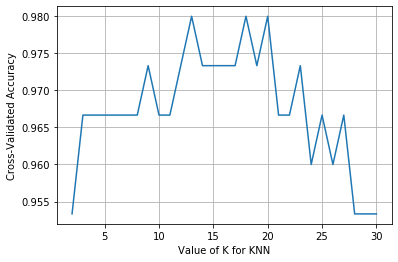

In [16]:
plt.plot(range(2,31),ran)
plt.grid(True)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Grid Search CV

In [17]:
from sklearn.model_selection import GridSearchCV

In [19]:
#define the parameter values that should be searched
k_range = list(range(1,31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [20]:
#create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [21]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False)

In [22]:
grid.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [25]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[['mean_test_score','std_test_score','params']]

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,mean_test_score,std_test_score,params
0,0.960000,0.053333,{'n_neighbors': 1}
1,0.953333,0.052068,{'n_neighbors': 2}
2,0.966667,0.044721,{'n_neighbors': 3}
3,0.966667,0.044721,{'n_neighbors': 4}
4,0.966667,0.044721,{'n_neighbors': 5}
5,0.966667,0.044721,{'n_neighbors': 6}
6,0.966667,0.044721,{'n_neighbors': 7}
7,0.966667,0.044721,{'n_neighbors': 8}
8,0.973333,0.032660,{'n_neighbors': 9}
9,0.966667,0.044721,{'n_neighbors': 10}


In [26]:
print(grid.cv_results_['params'][0])
print(grid.cv_results_['mean_test_score'][0])

{'n_neighbors': 1}
0.96


In [27]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


In [28]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')


In [29]:
k_range = list(range(1,31))
weight_options = ['uniform','distance']

In [30]:
param_grid = dict(n_neighbors=k_range,weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [31]:
grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy',return_train_score=False)
grid.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=30, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [32]:
print(grid.best_score_)
print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


In [34]:
from sklearn.model_selection import RandomizedSearchCV
param_dict = dict(n_neighbors = k_range,weights = weight_options)

In [35]:
rand = RandomizedSearchCV(knn,param_dict,cv=10,scoring='accuracy',n_iter = 10,random_state=5,return_train_score=False)
rand.fit(x,y)
pd.DataFrame(rand.cv_results_)[['mean_test_score','std_test_score','params']]

,mean_test_score,std_test_score,params
0,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 16}"
1,0.966667,0.033333,"{'weights': 'uniform', 'n_neighbors': 22}"
2,0.980000,0.030551,"{'weights': 'uniform', 'n_neighbors': 18}"
3,0.966667,0.044721,"{'weights': 'uniform', 'n_neighbors': 27}"
4,0.953333,0.042687,"{'weights': 'uniform', 'n_neighbors': 29}"
5,0.973333,0.032660,"{'weights': 'distance', 'n_neighbors': 10}"
6,0.966667,0.044721,"{'weights': 'distance', 'n_neighbors': 22}"
7,0.973333,0.044222,"{'weights': 'uniform', 'n_neighbors': 14}"
8,0.973333,0.044222,"{'weights': 'distance', 'n_neighbors': 12}"
9,0.973333,0.032660,"{'weights': 'uniform', 'n_neighbors': 15}"


In [36]:
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}
